本次代码块运用的图片展示

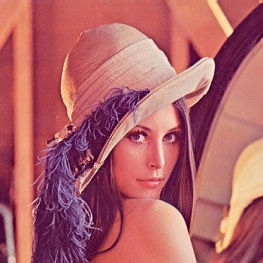

In [1]:
#导入必要模块
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#方便图片展示
#注意有默认参数的变量要在后面
def show(img,title = 'Test'):
    cv2.imshow(title,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
#图片重载函数
def init_img(img):
    img = cv2.imread("images/lena.jpg")
    return img

In [4]:
#显示图像

img = cv2.imread("images/lena.jpg")
cv2.imshow("Lena",img)#指定窗口的名字为lena
cv2.waitKey(0)
cv2.destroyAllWindows()

#读入灰度图
img = cv2.imread("images/lena.jpg",cv2.IMREAD_GRAYSCALE)
show(img)

#也可以这样
img = init_img(img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
show(img)

In [5]:
#灰度图已经丢失了通道信息,无法通过cvt函数还原
img = init_img(img)

In [6]:
#生成可以调整窗口大小的图片(不能与之前的窗口同名)
cv2.namedWindow("Resizeable",cv2.WINDOW_NORMAL)
cv2.imshow("Resizeable",img)#要在对应窗口展示
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#无条件保存图片
cv2.imwrite("saves/lena_resave.png",img)#指定目录下的路径,图片名,类型即可

True

In [24]:
#按Esc不保存,按s保存
cv2.imshow("Lena",img)

#64位系统的读取键盘方式
k = cv2.waitKey(0)&0xFF
if k == ord('s'):
    cv2.imwrite("saves/lena.jpg",img)
cv2.destroyAllWindows()

下面开始引入matplotlib库加载图片,注意cv2与matplotlib加载图片的差异

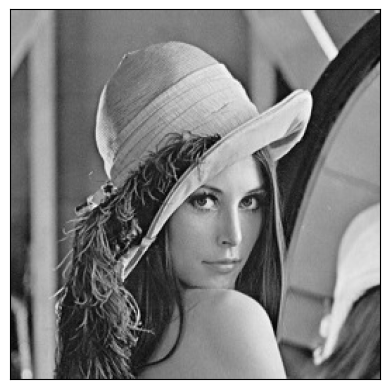

In [12]:
img = init_img(img)
#先读入灰度,灰度没有通道差异
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap = 'gray')
plt.xticks([]),plt.yticks([])#隐藏坐标轴刻度
plt.show()

#记得恢复
img = init_img(img)

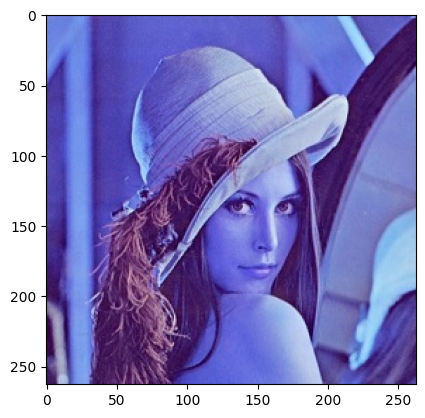

In [13]:
#若直接输出彩图,发现不对,因为cv2读入图片处理为BGR,而matplotlib读入默认为RGB
plt.imshow(img)
plt.show()

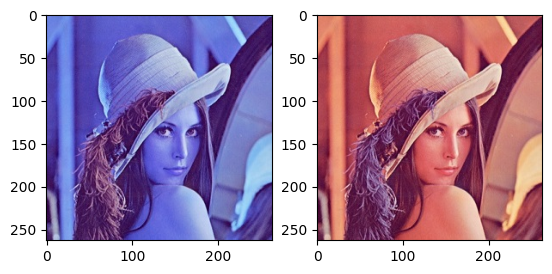

In [14]:
#通过分割通道恢复cv2的图像在matplotlib中的展示
img = init_img(img)
b,g,r = cv2.split(img)
img2 = cv2.merge([r,g,b])
plt.subplot(121);plt.imshow(img) #用matplotlib展示,错误的
plt.subplot(122);plt.imshow(img2) #正确的
plt.show()

cv2.imshow('bgr image',img) #cv2展示,正确的
cv2.imshow('rgb image',img2) #错误的
cv2.waitKey(0)
cv2.destroyAllWindows()

我对上述现象的理解:<br>
matplotllib与cv2的"图像解读器不同",<br>
plt将numpy数组通道解读为rgb,例如[1,2,3]这个像素点,1被节点为红色<br>
cv2将numpy数组通道解读为bgr,[1,2,3]这个像素点,1被解读为蓝色<br>

In [16]:
#一些展示函数
#注意:下面函数使用严格要求图片类型一样,大小一样

img = init_img(img)
combine = np.hstack([img,img])

show(combine)

combine = np.vstack([img,img])
show(combine)

#一般形式
combine = np.concatenate([img,img],axis = 0)
show(combine)